## Let's import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output

## Loading the datasets

In [2]:
house_df = pd.read_csv('recs2015_public_v4.csv')
layout_data = pd.read_csv('codebook_publicv4.csv')

## Let's build some intuition over the datasets

In [3]:
layout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SAS Variable Name     760 non-null    object 
 1   Variable Type         759 non-null    object 
 2   Length                759 non-null    float64
 3   Variable Description  759 non-null    object 
 4   Decode                490 non-null    object 
 5   Unnamed: 5            0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 35.8+ KB


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Columns: 759 entries, DOEID to ZLPAMOUNT
dtypes: float64(262), int64(493), object(4)
memory usage: 32.9+ MB


In [5]:
# some columns
print(layout_data.columns)
print(house_df.columns)

Index(['SAS Variable Name', 'Variable Type', 'Length', 'Variable Description',
       'Decode', 'Unnamed: 5'],
      dtype='object')
Index(['DOEID', 'REGIONC', 'DIVISION', 'METROMICRO', 'UATYP10', 'TYPEHUQ',
       'ZTYPEHUQ', 'CELLAR', 'ZCELLAR', 'BASEFIN',
       ...
       'ZELAMOUNT', 'NGXBTU', 'PERIODNG', 'ZNGAMOUNT', 'FOXBTU', 'PERIODFO',
       'ZFOAMOUNT', 'LPXBTU', 'PERIODLP', 'ZLPAMOUNT'],
      dtype='object', length=759)


In [6]:
# total variables
print("Number of variables: ",layout_data['SAS Variable Name'].nunique())

Number of variables:  760


In [7]:
# some samples
house_df.sample(5)

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
3136,13137,3,5,METRO,U,2,0,0,0,-2,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
4926,14927,4,8,METRO,R,2,0,1,0,1,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
2370,12371,3,5,METRO,U,2,0,1,0,1,...,0,106.40,5,1,137.45,-2,-2,91.33,-2,-2
5076,15077,4,10,METRO,U,2,0,0,0,-2,...,0,103.02,1,0,137.45,-2,-2,91.33,-2,-2
901,10902,2,4,NONE,R,2,0,1,0,1,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2


In [8]:
house_df.describe()

,DOEID,REGIONC,DIVISION,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,ATTIC,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
count,5686.000000,5686.000000,5686.000000,5686.000000,5686.0,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,...,5686.000000,3304.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5.686000e+03,5686.000000,5686.000000
mean,12843.500000,2.760816,5.670243,2.596025,0.0,-0.205593,-0.505276,-1.199261,-1.381815,-0.111854,...,0.109040,100.088868,0.181674,-0.731094,137.441423,-1.738305,-1.872318,9.133000e+01,-1.479071,-1.748505
std,1641.551147,1.004187,2.842655,1.164641,0.0,1.134775,0.880288,1.235166,0.933693,1.187953,...,0.311716,4.437933,2.197037,1.117215,0.142739,1.197667,0.558504,2.842421e-14,1.663040,0.767910
min,10001.000000,1.000000,1.000000,1.000000,0.0,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,83.340000,-2.000000,-2.000000,135.000000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
25%,11422.250000,2.000000,3.000000,2.000000,0.0,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,99.050000,-2.000000,-2.000000,137.450000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
50%,12843.500000,3.000000,5.000000,2.000000,0.0,0.000000,0.000000,-2.000000,-2.000000,0.000000,...,0.000000,101.145000,1.000000,0.000000,137.450000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
75%,14264.750000,4.000000,8.000000,3.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,102.780000,1.000000,0.000000,137.450000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
max,15686.000000,4.000000,10.000000,5.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,107.720000,5.000000,1.000000,137.450000,5.000000,1.000000,9.133000e+01,5.000000,1.000000


In [9]:
# creating the variable names and variable descriptions in two separate lists: from dataColumns
labels = list(layout_data['SAS Variable Name'])
full_form = list(layout_data['Variable Description'])
variable_type = list(layout_data['Variable Type'])

In [10]:
def WhatIs(place):
    indeX = labels.index(place)
    print(place, "is", full_form[indeX], ': ', variable_type[indeX])

In [11]:
# let's learn about the variabls/features
for i in labels:
    WhatIs(i)

DOEID is Unique identifier for each respondent :  Character
REGIONC is Census Region :  Numeric
DIVISION is Census Division :  Numeric
METROMICRO is Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area :  Character
UATYP10 is Census 2010 Urban Type :  Character
TYPEHUQ is Type of housing unit :  Numeric
ZTYPEHUQ is Imputation flag for TYPEHUQ :  Numeric
CELLAR is Housing unit over a basement :  Numeric
ZCELLAR is Imputation flag for CELLAR :  Numeric
BASEFIN is Finished basement :  Numeric
ZBASEFIN is Imputation flag for BASEFIN :  Numeric
ATTIC is Attic above the housing unit :  Numeric
ZATTIC is Imputation flag for ATTIC :  Numeric
ATTICFIN is Finished attic :  Numeric
ZATTICFIN is Imputation flag for ATTICFIN :  Numeric
STORIES is Number of stories in a single-family home :  Numeric
ZSTORIES is Imputation flag for STORIES :  Numeric
PRKGPLC1 is Attached garage :  Numeric
ZPRKGPLC1 is Imputation flag for PRKGPLC1 :  Numeric
SIZEOFGARAGE is Size of att

In [12]:
# all the available features
house_df.columns.values

array(['DOEID', 'REGIONC', 'DIVISION', 'METROMICRO', 'UATYP10', 'TYPEHUQ',
       'ZTYPEHUQ', 'CELLAR', 'ZCELLAR', 'BASEFIN', 'ZBASEFIN', 'ATTIC',
       'ZATTIC', 'ATTICFIN', 'ZATTICFIN', 'STORIES', 'ZSTORIES',
       'PRKGPLC1', 'ZPRKGPLC1', 'SIZEOFGARAGE', 'ZSIZEOFGARAGE',
       'KOWNRENT', 'ZKOWNRENT', 'YEARMADERANGE', 'ZYEARMADERANGE',
       'OCCUPYYRANGE', 'ZOCCUPYYRANGE', 'STUDIO', 'ZSTUDIO', 'BEDROOMS',
       'ZBEDROOMS', 'NCOMBATH', 'ZNCOMBATH', 'NHAFBATH', 'ZNHAFBATH',
       'OTHROOMS', 'ZOTHROOMS', 'TOTROOMS', 'ZTOTROOMS', 'WALLTYPE',
       'ZWALLTYPE', 'ROOFTYPE', 'ZROOFTYPE', 'HIGHCEIL', 'ZHIGHCEIL',
       'DOOR1SUM', 'ZDOOR1SUM', 'WINDOWS', 'ZWINDOWS', 'TYPEGLASS',
       'ZTYPEGLASS', 'WINFRAME', 'ZWINFRAME', 'ADQINSUL', 'ZADQINSUL',
       'DRAFTY', 'ZDRAFTY', 'UGASHERE', 'ZUGASHERE', 'SWIMPOOL',
       'ZSWIMPOOL', 'MONPOOL', 'ZMONPOOL', 'POOL', 'ZPOOL', 'FUELPOOL',
       'ZFUELPOOL', 'RECBATH', 'ZRECBATH', 'MONTUB', 'ZMONTUB', 'FUELTUB',
       'ZFUELTUB', 'OUT

In [13]:
WhatIs('ZYEARMADERANGE')

ZYEARMADERANGE is Imputation flag for YEARMADERANGE :  Numeric


## Let's create the output/target feature

In [14]:
# crosschecking
total_natural_gas_incode = house_df[['BTUNGSPH', 'BTUNGWTH', 'BTUNGCOK',
       'BTUNGCDR', 'BTUNGPLHEAT', 'BTUNGHTBHEAT', 'BTUNGNEC']].sum(axis=1)
total_natural_gas_incode

0       30990.800
1           0.000
2       29483.956
3           0.000
4       25951.531
          ...    
5681    22203.497
5682     6426.518
5683        0.000
5684        0.000
5685        0.000
Length: 5686, dtype: float64

In [15]:
# crosschecking
house_df['BTUNG']

0       30990.800
1           0.000
2       29483.956
3           0.000
4       25951.531
          ...    
5681    22203.497
5682     6426.518
5683        0.000
5684        0.000
5685        0.000
Name: BTUNG, Length: 5686, dtype: float64

In [16]:
# learnign all the BTU types we have
types_of_usage_in_btu = house_df[['BTUEL', 'BTUNG', 'BTULP', 'BTUFO']]
for each in types_of_usage_in_btu:
    WhatIs(each)

BTUEL is Total site electricity usage, in thousand Btu, 2015 :  Numeric
BTUNG is Total natural gas usage, in thousand Btu, 2015 :  Numeric
BTULP is Total propane usage, in thousand Btu, 2015 :  Numeric
BTUFO is Total fuel oil/kerosene usage, in thousand Btu, 2015 :  Numeric


In [17]:
# checking if colunms contain null-values. If yes, replace with 0.
if types_of_usage_in_btu.isnull().values.any()==True:
    print('Some columns contain Null values.')
    types_of_usage_in_btu.fillna(0)
else: print('No columns contain Null values.')

No columns contain Null values.


In [18]:
# calculating total BTU consumption
house_df['TOTALBTU_incode'] = types_of_usage_in_btu.sum(axis=1)
house_df['TOTALBTU_incode']

0       48974.571
1       41534.000
2       96548.160
3       89284.345
4       36582.146
          ...    
5681    28839.497
5682    22424.616
5683    12323.219
5684    47673.902
5685    37174.422
Name: TOTALBTU_incode, Length: 5686, dtype: float64

KWH is Total site electricity usage, in kilowatthours, 2015 :  Numeric
BTUEL is Total site electricity usage, in thousand Btu, 2015 :  Numeric
CUFEETNG is Total natural gas usage, in hundred cubic feet, 2015 :  Numeric
BTUNG is Total natural gas usage, in thousand Btu, 2015 :  Numeric
GALLONLP is Total propane usage, in gallons, 2015 :  Numeric
BTULP is Total propane usage, in thousand Btu, 2015 :  Numeric
GALLONFO is Total fuel oil/kerosene usage, in gallons, 2015 :  Numeric
BTUFO is Total fuel oil/kerosene usage, in thousand Btu, 2015 :  Numeric


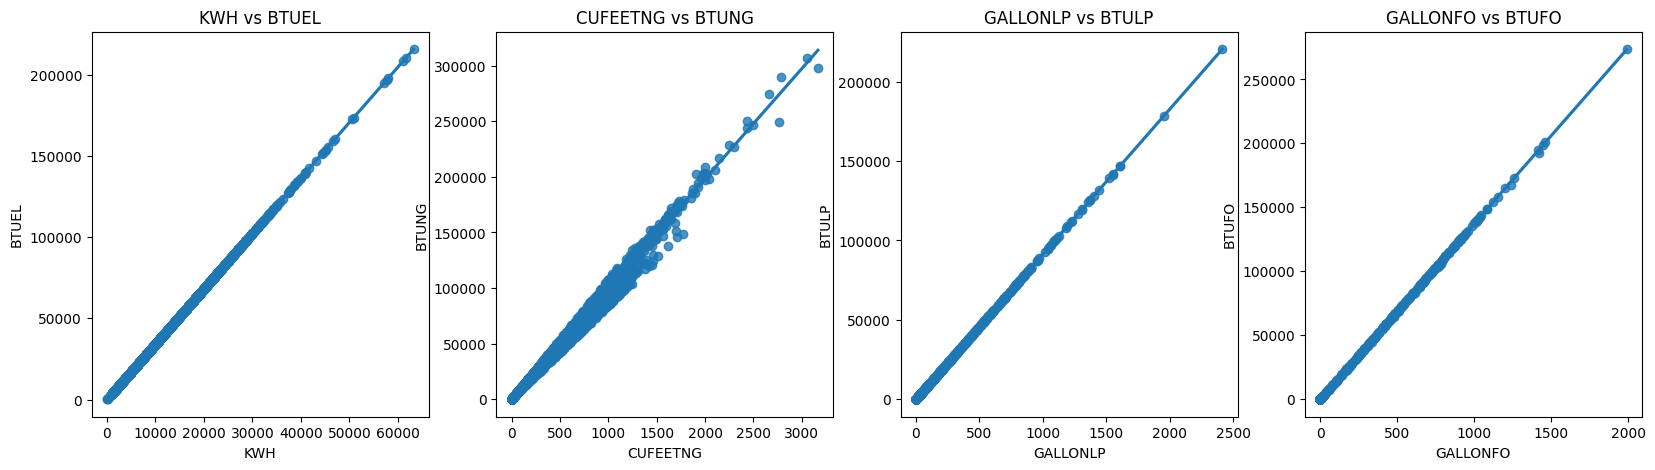

In [19]:
# regplot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='KWH', y='BTUEL', data=house_df[['KWH', 'BTUEL']], ax=axes[0])
axes[0].set_title("KWH vs BTUEL") 

sns.regplot(x='CUFEETNG', y='BTUNG', data=house_df[['CUFEETNG', 'BTUNG']], ax=axes[1])
axes[1].set_title("CUFEETNG vs BTUNG") 

sns.regplot(x='GALLONLP', y='BTULP', data=house_df[['GALLONLP', 'BTULP']], ax=axes[2])
axes[2].set_title("GALLONLP vs BTULP") 

sns.regplot(x='GALLONFO', y='BTUFO', data=house_df[['GALLONFO', 'BTUFO']], ax=axes[3])
axes[3].set_title("GALLONFO vs BTUFO") 

for i in ['KWH', 'BTUEL', 'CUFEETNG', 'BTUNG', 'GALLONLP', 'BTULP', 'GALLONFO', "BTUFO"]:
    WhatIs(i)

plt.show()



## Let's narrow down the dataset to have only the necessary ones

In [20]:
# dropping all the unnecessary columns

new_house_df = house_df.drop(columns=['DOEID','NWEIGHT','BRRWT1','BRRWT2','BRRWT3','BRRWT4','BRRWT5','BRRWT6','BRRWT7','BRRWT8','BRRWT9','BRRWT10',
                        'BRRWT11','BRRWT12','BRRWT13','BRRWT14','BRRWT15','BRRWT16','BRRWT17','BRRWT18','BRRWT19','BRRWT20','BRRWT21',
                        'BRRWT22','BRRWT23','BRRWT24','BRRWT25','BRRWT26','BRRWT27','BRRWT28','BRRWT29','BRRWT30','BRRWT31','BRRWT32',
                        'BRRWT33','BRRWT34','BRRWT35','BRRWT36','BRRWT37','BRRWT38','BRRWT39','BRRWT40','BRRWT41','BRRWT42','BRRWT43',
                        'BRRWT44','BRRWT45','BRRWT46','BRRWT47','BRRWT48','BRRWT49','BRRWT50','BRRWT51','BRRWT52','BRRWT53','BRRWT54',
                        'BRRWT55','BRRWT56','BRRWT57','BRRWT58','BRRWT59','BRRWT60','BRRWT61','BRRWT62','BRRWT63','BRRWT64','BRRWT65',
                        'BRRWT66','BRRWT67','BRRWT68','BRRWT69','BRRWT70','BRRWT71','BRRWT72','BRRWT73','BRRWT74','BRRWT75','BRRWT76',
                        'BRRWT77','BRRWT78','BRRWT79','BRRWT80','BRRWT81','BRRWT82','BRRWT83','BRRWT84','BRRWT85','BRRWT86','BRRWT87',
                        'BRRWT88','BRRWT89','BRRWT90','BRRWT91','BRRWT92','BRRWT93','BRRWT94','BRRWT95','BRRWT96',
                        'KWH','KWHSPH','KWHCOL','KWHWTH','KWHRFG','KWHRFG1','KWHRFG2','KWHFRZ','KWHCOK','KWHMICRO','KWHCW','KWHCDR',
                        'KWHDWH','KWHLGT','KWHTVREL','KWHTV1','KWHTV2','KWHAHUHEAT','KWHAHUCOL','KWHEVAPCOL','KWHCFAN','KWHDHUM',
                        'KWHHUM','KWHPLPMP','KWHHTBPMP','KWHHTBHEAT','KWHNEC','BTUEL','BTUELSPH','BTUELCOL','BTUELWTH','BTUELRFG',
                        'BTUELRFG1','BTUELRFG2','BTUELFRZ','BTUELCOK','BTUELMICRO','BTUELCW','BTUELCDR','BTUELDWH','BTUELLGT',
                        'BTUELTVREL','BTUELTV1','BTUELTV2','BTUELAHUHEAT','BTUELAHUCOL','BTUELEVAPCOL','BTUELCFAN','BTUELDHUM',
                        'BTUELHUM','BTUELPLPMP','BTUELHTBPMP','BTUELHTBHEAT','BTUELNEC','DOLLAREL','DOLELSPH','DOLELCOL','DOLELWTH',
                        'DOLELRFG','DOLELRFG1','DOLELRFG2','DOLELFRZ','DOLELCOK','DOLELMICRO','DOLELCW','DOLELCDR','DOLELDWH',
                        'DOLELLGT','DOLELTVREL','DOLELTV1','DOLELTV2','DOLELAHUHEAT','DOLELAHUCOL','DOLELEVAPCOL','DOLELCFAN',
                        'DOLELDHUM','DOLELHUM','DOLELPLPMP','DOLELHTBPMP','DOLELHTBHEAT','DOLELNEC','CUFEETNG','CUFEETNGSPH',
                        'CUFEETNGWTH','CUFEETNGCOK','CUFEETNGCDR','CUFEETNGPLHEAT','CUFEETNGHTBHEAT','CUFEETNGNEC','BTUNG','BTUNGSPH',
                        'BTUNGWTH','BTUNGCOK','BTUNGCDR','BTUNGPLHEAT','BTUNGHTBHEAT','BTUNGNEC','DOLLARNG','DOLNGSPH','DOLNGWTH',
                        'DOLNGCOK','DOLNGCDR','DOLNGPLHEAT','DOLNGHTBHEAT','DOLNGNEC','GALLONLP','GALLONLPSPH','GALLONLPWTH',
                        'GALLONLPCOK','GALLONLPCDR','GALLONLPNEC','BTULP','BTULPSPH','BTULPWTH','BTULPCOK','BTULPCDR','BTULPNEC',
                        'DOLLARLP','DOLLPSPH','DOLLPWTH','DOLLPCOK','DOLLPCDR','DOLLPNEC','GALLONFO','GALLONFOSPH','GALLONFOWTH',
                        'GALLONFONEC','BTUFO','BTUFOSPH','BTUFOWTH','BTUFONEC','DOLLARFO','DOLFOSPH','DOLFOWTH','DOLFONEC','TOTALBTU',
                        'TOTALDOL','TOTALBTUSPH','TOTALDOLSPH','TOTALBTUWTH','TOTALDOLWTH','TOTALBTUCOK','TOTALDOLCOK','TOTALBTUCDR',
                        'TOTALDOLCDR','TOTALBTUPL','TOTALDOLPL','TOTALBTUHTB','TOTALDOLHTB','TOTALBTUNEC','TOTALDOLNEC','WOODAMT',
                        'WOODBTU','PELLETAMT','PELLETBTU','ELXBTU','PERIODEL','NGXBTU','PERIODNG','FOXBTU','PERIODFO','LPXBTU',
                        'PERIODLP', 'AUDIT', 'AUDITCHG', 'EELIGHTS',
                        'FREEAUDIT', 'REBATEAPP', 'RECYCAPP','TAXCREDITAPP', 
                        'BENOTHER', 'ELPAY', 'NGPAY', 'LPGPAY',
                        'FOPAY', 'SMARTMETER', 'INTDATA', 'INTDATAACC', 'HOUSEHOLDER_RACE', 'PAYHELP'])

new_house_df


,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,...,GWT,DBT1,DBT99,ZWOODAMT,ZPELLETAMT,ZELAMOUNT,ZNGAMOUNT,ZFOAMOUNT,ZLPAMOUNT,TOTALBTU_incode
0,4,10,METRO,U,2,0,0,0,-2,-2,...,62.27,97.9,33.0,-2,-2,0,0,-2,-2,48974.571
1,3,7,NONE,R,2,0,0,0,-2,-2,...,67.36,96.8,31.7,-2,-2,1,-2,-2,-2,41534.000
2,3,6,METRO,U,2,0,1,0,1,0,...,62.32,92.5,24.9,-2,-2,0,0,-2,-2,96548.160
3,2,4,MICRO,C,2,0,1,0,1,0,...,56.76,91.3,15.9,-2,-2,0,-2,-2,0,89284.345
4,1,2,METRO,U,2,0,1,0,0,0,...,50.04,88.4,15.5,-2,-2,0,0,-2,-2,36582.146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,2,3,METRO,U,5,0,-2,-2,-2,-2,...,46.87,86.5,3.2,-2,-2,1,1,-2,-2,28839.497
5682,3,6,MICRO,C,2,0,0,0,-2,-2,...,63.07,92.7,26.8,-2,-2,0,0,-2,-2,22424.616
5683,2,3,METRO,U,5,0,-2,-2,-2,-2,...,50.31,90.2,1.3,-2,-2,0,-2,-2,-2,12323.219
5684,3,7,METRO,R,2,0,0,0,-2,-2,...,71.09,98.7,31.9,-2,-2,0,-2,-2,-2,47673.902


In [21]:
# dropping all the z-columns

new_house_df = new_house_df.drop(columns=['ZADQINSUL', 'ZAGECDRYER', 'ZAGECENAC', 'ZAGECWASH', 'ZAGEDW', 'ZAGEFRZR', 'ZAGERFRI1', 'ZAGERFRI2','ZAIRCOND', 'ZALTFUELPEV', 'ZAMTMICRO', 'ZAPPOTHER', 'ZATHOME', 'ZATTCCOOL', 'ZATTCHEAT', 'ZATTIC', 
                                  'ZATTICFIN', 'ZBACKUP', 'ZBASECOOL', 'ZBASEFIN', 'ZBASEHEAT', 'ZBEDROOMS', 'ZBLENDER', 'ZCABLESAT', 
                                  'ZCELLAR', 'ZCELLPHONE', 'ZCENACHP', 'ZCOFFEE', 'ZCOLDMA', 'ZCOMBODVR', 'ZCOOKTUSE', 'ZCOOLTYPE', 
                                  'ZCROCKPOT', 'ZCWASHER', 'ZDESKTOP', 'ZDISHWASH', 'ZDNTHEAT', 'ZDOOR1SUM', 'ZDRAFTY', 'ZDRYER', 
                                  'ZDRYRFUEL', 'ZDRYRUSE', 'ZDUALCOOKTFUEL', 'ZDUALOVENFUEL', 'ZDVD', 'ZDWASHUSE', 'ZDWCYCLE', 
                                  'ZEDUCATION', 'ZELPAY', 'ZELPERIPH', 'ZEMPLOYHH', 'ZENERGYASST', 'ZENERGYASST11', 'ZENERGYASST12', 
                                  'ZENERGYASST13', 'ZENERGYASST14', 'ZENERGYASST15', 'ZENERGYASSTOTH', 'ZEQUIPAGE', 'ZEQUIPAUX', 
                                  'ZEQUIPAUXTYPE', 'ZEQUIPM', 'ZEQUIPMUSE', 'ZFOODPROC', 'ZFOPAY', 'ZFUELAUX', 'ZFUELH2O', 
                                  'ZFUELH2O2', 'ZFUELHEAT', 'ZFUELPOOL', 'ZFUELTUB', 'ZGARGCOOL', 'ZGARGHEAT', 'ZH2OHEATAPT', 
                                  'ZHEATHOME', 'ZHHAGE', 'ZHHSEX', 'ZHIGHCEIL', 'ZHOTMA', 'ZHOUSEHOLDER_RACE', 'ZICE', 'ZINTERNET', 
                                  'ZINTSTREAM', 'ZINWIRELESS', 'ZKOWNRENT', 'ZLGTIN4', 'ZLGTINCAN', 'ZLGTINCFL', 'ZLGTINCNTL', 
                                  'ZLGTINLED', 'ZLGTINNUM', 'ZLGTOUTCNTL', 'ZLGTOUTNUM', 'ZLOCRFRI2', 'ZLPGPAY', 'ZMICRO', 'ZMOISTURE', 
                                  'ZMONEYPY', 'ZMONPOOL', 'ZMONTUB', 'ZMORETHAN1H2O', 'ZNCOMBATH', 'ZNGPAY', 'ZNHAFBATH', 'ZNHSLDMEM', 
                                  'ZNOACBROKE', 'ZNOACDAYS', 'ZNOACEL', 'ZNOACHELP', 'ZNOHEATBROKE', 'ZNOHEATBULK', 'ZNOHEATDAYS', 
                                  'ZNOHEATEL', 'ZNOHEATHELP', 'ZNOHEATNG', 'ZNOTMOIST', 'ZNUMADULT', 'ZNUMATTICFAN', 'ZNUMBERAC', 
                                  'ZNUMCFAN', 'ZNUMCHILD', 'ZNUMFLOORFAN', 'ZNUMFREEZ', 'ZNUMFRIG', 'ZNUMLAPTOP', 'ZNUMMEAL', 
                                  'ZNUMSMPHONE', 'ZNUMTABLET', 'ZNUMWHOLEFAN', 'ZOCCUPYYRANGE', 'ZOTHROOMS', 'ZOUTGRILL', 
                                  'ZOUTGRILLFUEL', 'ZOUTLET', 'ZOVEN', 'ZOVENFUEL', 'ZOVENUSE', 'ZPAYHELP', 'ZPLAYSTA', 'ZPOOL', 
                                  'ZPRKGPLC1', 'ZPROTHERM', 'ZPROTHERMAC', 'ZRECBATH', 'ZRICECOOK', 'ZRNSETEMP', 'ZROOFTYPE', 'ZSCALEB', 
                                  'ZSCALEE', 'ZSCALEG', 'ZSDESCENT', 'ZSEPCOOKTUSE', 'ZSEPDVR', 'ZSEPOVENUSE', 'ZSIZEOFGARAGE', 
                                  'ZSIZFREEZ', 'ZSIZRFRI1', 'ZSIZRFRI2', 'ZSTORIES', 'ZSTOVE', 'ZSTOVEFUEL', 'ZSTOVEN', 'ZSTOVENFUEL', 
                                  'ZSTUDIO', 'ZSWAMPCOL', 'ZSWIMPOOL', 'ZTEMPGONE', 'ZTEMPGONEAC', 'ZTEMPHOME', 'ZTEMPHOMEAC', 
                                  'ZTEMPNITE', 'ZTEMPNITEAC', 'ZTHERMAIN', 'ZTHERMAINAC', 'ZTOAST', 'ZTOASTOVN', 'ZTOPFRONT', 
                                  'ZTOTROOMS', 'ZTOTSQFT_EN', 'ZTVAUDIOSYS', 'ZTVCOLOR', 'ZTVONWD1', 'ZTVONWD2', 'ZTVONWE1', 'ZTVONWE2', 
                                  'ZTVSIZE1', 'ZTVSIZE2', 'ZTVTYPE1', 'ZTVTYPE2', 'ZTYPEGLASS', 'ZTYPEHUQ', 'ZTYPERFR1', 'ZTYPERFR2', 
                                  'ZUGASHERE', 'ZUPRTFRZR', 'ZUSECENAC', 'ZUSEMOISTURE', 'ZUSENOTMOIST', 'ZUSEWWAC', 'ZVCR', 'ZWALLTYPE', 
                                  'ZWASHLOAD', 'ZWASHTEMP', 'ZWDPELLET', 'ZWHEATAGE', 'ZWHEATSIZ', 'ZWINDOWS', 'ZWINFRAME', 'ZWOODLOGS', 
                                  'ZWWACAGE', 'ZYEARMADERANGE', 'ZWOODAMT', 'ZPELLETAMT', 'ZELAMOUNT',
                                  'ZNGAMOUNT', 'ZFOAMOUNT', 'ZLPAMOUNT'])
new_house_df.shape


(5686, 265)

In [22]:
appliances = ['OUTLET','ALTFUELPEV','BACKUP','SOLAR','NUMFRIG','SIZRFRI1','TYPERFR1','AGERFRI1','ICE','SIZRFRI2',
                                  'TYPERFR2','AGERFRI2','LOCRFRI2','NUMFREEZ','UPRTFRZR','SIZFREEZ','AGEFRZR','STOVEN','STOVENFUEL',
                                  'DUALCOOKTFUEL','DUALOVENFUEL','COOKTUSE','OVENUSE','STOVE','STOVEFUEL','SEPCOOKTUSE','OVEN',
                                  'OVENFUEL','SEPOVENUSE','MICRO','AMTMICRO','OUTGRILL','OUTGRILLFUEL','NUMMEAL','TOAST','TOASTOVN',
                                  'COFFEE','CROCKPOT','FOODPROC','RICECOOK','BLENDER','APPOTHER','DISHWASH','DWASHUSE','DWCYCLE',
                                  'AGEDW','CWASHER','TOPFRONT','WASHLOAD','WASHTEMP','RNSETEMP','AGECWASH','DRYER','DRYRFUEL',
                                  'DRYRUSE','AGECDRYER','TVCOLOR','TVSIZE1','TVTYPE1','TVONWD1','TVONWE1','TVSIZE2','TVTYPE2',
                                  'TVONWD2','TVONWE2','CABLESAT','COMBODVR','SEPDVR','PLAYSTA','DVD','VCR','INTSTREAM','TVAUDIOSYS',
                                  'DESKTOP','NUMLAPTOP','NUMTABLET','ELPERIPH','NUMSMPHONE','CELLPHONE','INTERNET','INWIRELESS']
print(len(appliances))
for i in appliances:
    WhatIs(i)

81
OUTLET is Outlet within 20 feet of vehicle parking :  Numeric
ALTFUELPEV is Plug-in electric vehicle :  Numeric
BACKUP is Back-up generator :  Numeric
SOLAR is On-site electricity generation from solar :  Numeric
NUMFRIG is Number of refrigerators used :  Numeric
SIZRFRI1 is Size of most-used refrigerator :  Numeric
TYPERFR1 is Door arrangement of most-used refrigerator :  Numeric
AGERFRI1 is Age of most-used refrigerator :  Numeric
ICE is Through-the-door ice on most-used refrigerator :  Numeric
SIZRFRI2 is Size of second most-used refrigerator :  Numeric
TYPERFR2 is Door arrangement of second most-used refrigerator :  Numeric
AGERFRI2 is Age of second most-used refrigerator :  Numeric
LOCRFRI2 is Location of second most-used refrigerator :  Numeric
NUMFREEZ is Number of separate freezers used :  Numeric
UPRTFRZR is Door arrangement of most-used freezer :  Numeric
SIZFREEZ is Size of most-used freezer :  Numeric
AGEFRZR is Age of most-used freezer :  Numeric
STOVEN is Number of sto

In [23]:
new_house_df.columns.values

array(['REGIONC', 'DIVISION', 'METROMICRO', 'UATYP10', 'TYPEHUQ',
       'CELLAR', 'BASEFIN', 'ATTIC', 'ATTICFIN', 'STORIES', 'PRKGPLC1',
       'SIZEOFGARAGE', 'KOWNRENT', 'YEARMADERANGE', 'OCCUPYYRANGE',
       'STUDIO', 'BEDROOMS', 'NCOMBATH', 'NHAFBATH', 'OTHROOMS',
       'TOTROOMS', 'WALLTYPE', 'ROOFTYPE', 'HIGHCEIL', 'DOOR1SUM',
       'WINDOWS', 'TYPEGLASS', 'WINFRAME', 'ADQINSUL', 'DRAFTY',
       'UGASHERE', 'SWIMPOOL', 'MONPOOL', 'POOL', 'FUELPOOL', 'RECBATH',
       'MONTUB', 'FUELTUB', 'OUTLET', 'ALTFUELPEV', 'BACKUP', 'SOLAR',
       'NUMFRIG', 'SIZRFRI1', 'TYPERFR1', 'AGERFRI1', 'ICE', 'SIZRFRI2',
       'TYPERFR2', 'AGERFRI2', 'LOCRFRI2', 'NUMFREEZ', 'UPRTFRZR',
       'SIZFREEZ', 'AGEFRZR', 'STOVEN', 'STOVENFUEL', 'DUALCOOKTFUEL',
       'DUALOVENFUEL', 'COOKTUSE', 'OVENUSE', 'STOVE', 'STOVEFUEL',
       'SEPCOOKTUSE', 'OVEN', 'OVENFUEL', 'SEPOVENUSE', 'MICRO',
       'AMTMICRO', 'OUTGRILL', 'OUTGRILLFUEL', 'NUMMEAL', 'TOAST',
       'TOASTOVN', 'COFFEE', 'CROCKPOT', '

## Let's apply mapping and remapping

In [24]:
# Mapping certain features.
replacements = {
    'REGIONC' : {1: 'Northeast', 2: 'Midwest', 3:'South', 4 : 'West'},
    'DIVISION' : {1: 'New England', 2 : 'Middle Atlantic' , 3 : 'East North Central', 4 : 'West North Central', 5 :'South Atlantic' , 
                  6: 'East South Central', 7: 'West South Central', 8: 'Mountain North', 9: 'Mountain South' , 10 : ' Pacific '},
    'TYPEHUQ': {1: 'Mobile home' , 2: 'Single-family detached house', 3 : 'single- family attached house', 
                4 : 'Apartment in a building with 2 to 4 units', 5: 'Apartment in a building with 5 or more units'},
    'CELLAR' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'BASEFIN': {1: 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'ATTIC': {1 : 'Yes', 0: 'No', -2 : 'Not Applicable'},
    'ATTICFIN' : {1 :'Yes', 0 : 'No', -2: 'Not Applicable' },
    'STORIES' : {10 : 'One story', 20 : 'Two stories', 31 : 'Three stories', 32 : 'Four or more stories', 40: 'Split-level', 
                 -2: 'Not Applicable'},
    'PRKGPLC1' : {1 : 'Yes', 0: 'No', -2 : 'Not Applicable'},
    'SIZEOFGARAGE' : {1 : 'One-car garage', 2 : 'Two-car garage', 3: 'Three-or-more-car garage' , -2 : 'Not Applicable'},
    'KOWNRENT': {1 : 'Owned or being bought by someone in your household', 2 : 'Rented', 3 : 'Occupied without payment of rent'},
    'YEARMADERANGE': {1 : 'Before 1950', 2 : '1950 to 1959', 3 : '1960 to 1969', 4 : '1970 to 1979', 5 :'1980 to 1989', 
                      6 : '1990 to 1999', 7 : '2000 to 2009', 8: '2010 to 2015'},
    'OCCUPYYRANGE' : {1 : 'Before 1950', 2 : '1950 to 1959', 3 : '1960 to 1969', 4 : '1970 to 1979', 5 :'1980 to 1989', 
                      6 : '1990 to 1999', 7 : '2000 to 2009', 8: '2010 to 2015'},
    'STUDIO': {1 :'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'WALLTYPE': {1 : 'Brick', 2: 'Wood', 3: 'Siding', 4 : 'Stucco', 5: 'Shingle (composition)', 6:'Stone', 
                 7 : 'Concrete or concrete block', 9: '0ther'},
    'ROOFTYPE': {1 : 'Ceramic or clay tiles', 2: 'Wood shingles/shakes', 3: 'Metal', 4: 'Slate or synthetic shake', 
                 5 : 'Shingles (composition or asphalt) ', 7: 'Concrete tiles', 9: 'Other', -2 : 'Not Applicable'},
    'HIGHCEIL' : {1: 'Yes', 0 :'No', -2 : 'Not Applicable'},
    'WINDOWS': {10 : '1 to 2', 20: '3 to 5', 30 : '6 to 9', 41 : '10 to 15', 42 : '16 to 19', 
                50 : '20 to 29', 60: '30 or more'},
    'TYPEGLASS': {1 : 'Single-pane glass', 2: 'Double-pane glass', 3 : 'Triple-pane glass'},
    'WINFRAME': {1 : 'Wood', 2 : 'Metal (aluminum)', 3 : 'Vinyl', 4 : 'Composite', 5 : 'Fiberglass'},
    'ADQINSUL': {1: 'Well insulated', 2 : 'Adequately insulated', 3 :'Poorly insulated', 4 : 'Not insulated'},
    'DRAFTY': {1: 'All the time', 2: 'Most of the time',3 : 'Some of the time', 4: 'Never'},
    'MONPOOL' : {-2: 0},
    'SWIMPOOL' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'POOL' : {1 : 'Yes', 0 : 'No' , -2 : 'Not Applicable'},
    'FUELPOOL': {1 : 'Natural gas from underground pipes', 2: 'Propane (bottled gas)', 3 :'Fuel oil/kerosene', 5:'Electricity', 
                 8:'Solar', 21 :'Some other fuel', -2 : 'Not Applicable'},
    'MONTUB' : {-2: 0},
    'FUELTUB' : {-2: 'Not Applicable', 21: 'Some other fuel'},
    'OUTLET' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'BACKUP' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'SOLAR' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'SIZRFRI1' : {1: 'Half-size or compact', 2: 'Small', 3: 'Medium', 4: 'Large', 5: 'Very large', -2: 'Not Applicable'},
    'TYPERFR1' :  {1: 'One door', 21: 'Two doors, freezer next to the refrigerator', 22: 'Two doors, freezer above the refrigerator',
                  23: 'Two doors, freezer below the refrigerator', 5: 'Three or more doors', -2: 'Not Applicable'},
    'AGERFRI1' : {1: 'Less than 2 years old', 2: '2 to 4 years old', 3: '5 to 9 years old', 
                  41:'10 to 14 years old', 42: '15 to 19 years old', 5: '20 years or older', -2: 'Not Applicable'},
    'ICE' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'SIZRFRI2' : {1: 'Half-size or compact', 2: 'Small', 3: 'Medium', 4: 'Large', 5: 'Very large', -2: 'Not Applicable'},
    'TYPERFR2' : {1: 'One door', 21: 'Two doors, freezer next to the refrigerator', 22: 'Two doors, freezer above the refrigerator',
                  23: 'Two doors, freezer below the refrigerator', 5: 'Three or more doors', -2: 'Not Applicable'},
    'AGERFRI2' : {1: 'Less than 2 years old', 2: '2 to 4 years old', 3: '5 to 9 years old', 
                  41:'10 to 14 years old', 42: '15 to 19 years old', 5: '20 years or older', -2: 'Not Applicable'},
    'LOCRFRI2' : {1: 'Basement', 2: 'Garage', 3: 'Outside', 4: 'Main floor of house', 9: 'Others', -2: 'Not Applicable'},
    'UPRTFRZR' : {1: 'Upright', 2: 'Chest', -2: 'Not Applicable'},
    'SIZFREEZ' : {1: 'Half-size or compact', 2: 'Small', 3: 'Medium', 4: 'Large', 5: 'Very large', -2: 'Not Applicable'},
    'AGEFRZR' : {1: 'Less than 2 years old', 2: '2 to 4 years old', 3: '5 to 9 years old', 
                  41:'10 to 14 years old', 42: '15 to 19 years old', 5: '20 years or older', -2: 'Not Applicable'},
    'STOVENFUEL' : {1: 'Natural gas from underground pipes', 2: 'Propane (Bottled gas)', 5: 'Electricity', 13: 'Dual fuel',
                    21: 'Some other fuel', -2: 'Not Applicable'},
    'DUALCOOKTFUEL' : {1: 'Natural gas from underground pipes', 2: 'Propane (Bottled gas)', 5: 'Electricity', 13: 'Dual fuel',
                    21: 'Some other fuel', -2: 'Not Applicable'},
    'DUALOVENFUEL' : {1: 'Natural gas from underground pipes', 2: 'Propane (Bottled gas)', 5: 'Electricity', 13: 'Dual fuel',
                    21: 'Some other fuel', -2: 'Not Applicable'},
    'COOKTUSE' : {-2: 0},
    'OVENUSE' : {-2: 0},
    'STOVEFUEL' : {1: 'Natural gas from underground pipes', 2: 'Propane (Bottled gas)', 5: 'Electricity', 13: 'Dual fuel',
                    21: 'Some other fuel', -2: 'Not Applicable'},
    'SEPCOOKTUSE' : {-2 : 0},
    'OVENFUEL' : {1: 'Natural gas from underground pipes', 2: 'Propane (Bottled gas)', 5: 'Electricity', 13: 'Dual fuel',
                    21: 'Some other fuel', -2: 'Not Applicable'},
    'SEPOVENUSE' : {-2 : 0},
    'AMTMICRO' : {-2 : 0},
    'OUTGRILLFUEL' : {1: 'Natural gas from underground pipes', 2: 'Propane (Bottled gas)',
                    21: 'Some other fuel', 23: 'Charcoal', -2: 'Not Applicable'},
    'NUMMEAL' : {1: 'Three or more times a day', 2: 'Two times a day', 3: 'Once a day', 
                 4: 'A few times each week', 5: 'About once a week', 6: 'Less than once a week', 0: 'Never'},
    'DWASHUSE' : {-2: 0},
    'DWCYCLE' : {1: 'Normal or default cycle without heated dry', 2: 'Normal or default cycle with heated dry',
                3: 'Heavy or "pots and pans" cycle', 4: 'Light or delicate cycle', 5: 'Energy saver', 
                -2: 'Not Applicable'},
    'AGEDW' :  {1: 'Less than 2 years old', 2: '2 to 4 years old', 3: '5 to 9 years old', 
                  41:'10 to 14 years old', 42: '15 to 19 years old', 5: '20 years or older', -2: 'Not Applicable'},
    'TOPFRONT' : {1: 'Top loading', 2: 'Front loading', -2: 'Not Applicable'},
    'WASHLOAD' : {-2: 0},
    'WASHTEMP' : {1: 'Hot', 2: 'Warm', 3: 'Cold', -2: 'Not Applicable'},
    'RNSETEMP' : {1: 'Hot', 2: 'Warm', 3: 'Cold', -2: 'Not Applicable'},
    'AGECWASH' : {1: 'Less than 2 years old', 2: '2 to 4 years old', 3: '5 to 9 years old', 
                  41:'10 to 14 years old', 42: '15 to 19 years old', 5: '20 years or older', 
                  -2: 'Not Applicable'},
    'DRYRFUEL' : {1: 'Natural gas from underground pipes', 2: 'Propane (Bottled gas)', 5: 'Electricity',
                    -2: 'Not Applicable'},
    'DRYRUSE' : {-2: 0},
    'AGECDRYER' : {1: 'Less than 2 years old', 2: '2 to 4 years old', 3: '5 to 9 years old', 
                  41:'10 to 14 years old', 42: '15 to 19 years old', 5: '20 years or older', 
                  -2: 'Not Applicable'},
    'TVSIZE1' : {1: '27 inches or less', 2: '28 to 39 inches', 3: '40 to 59 inches', 
                 4: '60 inches or more', -2: 'Not Applicable'},
    'TVTYPE1' : {1:'LCD', 2: 'Plasma', 3: 'LED', 4: 'Projection', 5: 'Standard tube', -2: 'Not Applicable'},
    'TVONWD1' : {1: 'Less than 1 hour', 2: '1 to 3 hours', 3: '4 to 6 hours', 4: '7 to 10 hours', 
                 5: 'More than 10 hours', -2: 'Not Applicable'},
    'TVONWE1' : {1: 'Less than 1 hour', 2: '1 to 3 hours', 3: '4 to 6 hours', 4: '7 to 10 hours', 
                 5: 'More than 10 hours', -2: 'Not Applicable'},
    'TVSIZE2' : {1: '27 inches or less', 2: '28 to 39 inches', 3: '40 to 59 inches', 
                 4: '60 inches or more', -2: 'Not Applicable'},
    'TVTYPE2':  {1:'LCD', 2: 'Plasma', 3: 'LED', 4: 'Projection', 5: 'Standard tube', -2: 'Not Applicable'},
    'TVONWD2' : {1: 'Less than 1 hour', 2: '1 to 3 hours', 3: '4 to 6 hours', 4: '7 to 10 hours', 
                 5: 'More than 10 hours', -2: 'Not Applicable'},
    'TVONWE2' : {1: 'Less than 1 hour', 2: '1 to 3 hours', 3: '4 to 6 hours', 4: '7 to 10 hours', 
                 5: 'More than 10 hours', -2: 'Not Applicable'},
    'CABLESAT' : {-2: 0},
    'COMBODVR' : {-2: 0},
    'SEPDVR' : {-2 : 0},
    'PLAYSTA' : {-2: 0},
    'DVD' : {-2 : 0},
    'VCR' : {-2 : 0},
    'INTSTREAM' : {-2 : 0},
    'TVAUDIOSYS' : {-2 : 0},
    'INTERNET' : {1: 'Yes', 0: 'No'},
    'INWIRELESS' : {1: 'Yes', 0: 'No', -2: 'Not Applicable'},
    'DNTHEAT' : {1: 'Have equipment, but dont use it', 2: 'Dont have equipment', 
                 -2: 'Not Applicable'},
    'EQUIPM': {2 : 'Steam/hot water system with radiators or pipes', 3 :'Central furnace', 4 : 'Heat pump', 
               5 : 'Built-in electric units installed in walls, ceilings, baseboards, or floors', 
               6 : 'Built-in floor/wall pipeless furnace', 7 : 'Built-in room heater burning gas, oil, or kerosene', 
               8 : 'Wood-burning stove (cordwood or pellets)', 9 : 'Fireplace', 10 : 'Portable electric heaters', 
               21 : 'Some other equipment',  -2 : 'Not Applicable'},
    'FUELHEAT': {1 : 'Natural gas from underground pipes', 2 : 'Propane (bottled gas)', 3 :'Fuel oil/kerosene', 5: 'Electricity', 
                 7 : 'Wood (cordwood or pellets)', 21 : 'Some other fuel', -2: 'Not Applicable'},
    'EQUIPAGE': {1 : 'Less than 2 years old', 2 : '2 to 4 years old', 3 :'5 to 9 years old', 41 : '10 to 14 years old',
                 42 : '15 to 19 years old', 5 : '20 years or older', -2 : 'Not Applicable'},
    'THERMAIN' : {1 : 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'PROTHERM' : {1 : 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'EQUIPMUSE' : {1: 'Set one temperature and leave it there most of the time',
                  2: 'Manually adjust the temperature at night or when no one is at home',
                  3: 'Program the thermostat to automatically adjust the temperature during the day and night at certain times',
                  4: 'Turn equipment on or off as needed',
                  5: 'Our household does not have control over the equipment',
                  9: 'Other', -9: 'Not Applicable'},
    'TEMPHOME' : {-2: 0},
    'TEMPGONE' : {-2: 0},
    'TEMPNITE' : {-2: 0},
    'EQUIPAUX' : {1 : 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'EQUIPAUXTYPE' : {1: 'Portable electric heater', 2: 'Wood-burning stove (cordwood or pellets)',
                     3: 'Natural gas fireplace', 4: 'Wood-burning fireplace', 9: 'Some other equipment',
                     -2: 'Not Applicable'},
    'FUELAUX' : {1 : 'Natural gas from underground pipes', 2 : 'Propane (bottled gas)', 3 :'Fuel oil/kerosene', 5: 'Electricity', 
                 7 : 'Wood (cordwood or pellets)', 21 : 'Some other fuel', -2: 'Not Applicable'},
    'BASEHEAT': {1 : 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'ATTCHEAT' : {1 : 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'GARGHEAT' : {1 : 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'USEMOISTURE' : {-2: 0},
    'COOLTYPE' : {1: 'Central air conditioning system', 2: 'Individual window/wall or portable units', 
                 3: 'Both a central system and individual units', -2: 'Not Applicable'},
    'CENACHP' : {1 : 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'AGECENAC': {1 : 'Less than 2 years old', 2 : '2 to 4 years old', 3 :'5 to 9 years old', 41 : '10 to 14 years old',
                 42 : '15 to 19 years old', 5 : '20 years or older', -2 : 'Not Applicable'},
    'THERMAINAC' : {1 : 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'PROTHERMAC' : {1 : 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'USECENAC' : {1: 'Set one temperature and leave it there most of the time',
                  2: 'Manually adjust the temperature at night or when no one is at home',
                  3: 'Program the thermostat to automatically adjust the temperature during the day and night at certain times',
                  4: 'Turn equipment on or off as needed',
                  5: 'Our household does not have control over the equipment',
                  9: 'Other', -2: 'Not Applicable'},
    'NUMBERAC' : {-2: 0},
    'WWACAGE' : {1 : 'Less than 2 years old', 2 : '2 to 4 years old', 3 :'5 to 9 years old', 41 : '10 to 14 years old',
                 42 : '15 to 19 years old', 5 : '20 years or older', -2 : 'Not Applicable'},
    'USEWWAC' : {1: 'Set one temperature and leave it there most of the time',
                  2: 'Manually adjust the temperature at night or when no one is at home',
                  3: 'Program the thermostat to automatically adjust the temperature during the day and night at certain times',
                  4: 'Turn equipment on or off as needed',
                  5: 'Our household does not have control over the equipment',
                  9: 'Other', -9: 'Not Applicable'},
    'TEMPHOMEAC' : {-2: 0},
    'TEMPGONEAC' : {-2: 0},
    'TEMPNITEAC' : {-2: 0},
    'ATTCCOOL' : {1 : 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'GARGCOOL' : {1 : 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'SWAMPCOL' : {1 : 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'NUMWHOLEFAN' : {-2: 0},
    'NUMATTICFAN' : {-2: 0},
    'USENOTMOIST' : {-2: 0},
    'FUELH2O' : {1 : 'Natural gas from underground pipes', 2 : 'Propane (bottled gas)', 3 :'Fuel oil/kerosene', 
                 5 : 'Electricity', 7: 'Wood (cordwood or pellets) ', 8 : 'Solar', 21: 'Some other fuel'},
    'BASECOOL': {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'H2OHEATAPT' : {1: 'In apartment', 2: 'Somewhere else in building', -2: 'Not Applicable'},
    'WHEATAGE' : {1 : 'Less than 2 years old', 2 : '2 to 4 years old', 3 :'5 to 9 years old', 41 : '10 to 14 years old',
                 42 : '15 to 19 years old', 5 : '20 years or older', -2 : 'Not Applicable'},
    'WHEATSIZ' : {1: 'Small tank', 2: 'Medium tank', 3: 'Large tank', 4: 'Tankless', -2: 'Not Applicable'},
    'MORETHAN1H2O' : {1 : 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'FUELH2O2' : {1 : 'Natural gas from underground pipes', 2 : 'Propane (bottled gas)', 3 :'Fuel oil/kerosene', 
                 5 : 'Electricity', 7: 'Wood (cordwood or pellets) ', 8 : 'Solar', 21: 'Some other fuel'},
    'LGTINNUM' : {1: 'Fewer than 20 bulbs', 2: '20 to 39 bulbs', 3: '40 to 59 bulbs', 
                 4: '60 to 79 bulbs', 5: '80 or more bulbs'},
    'LGTINCAN' : {1: 'All', 2: 'Most', 3: 'About half', 4: 'Some', 0: 'None'},
    'LGTINCFL' : {1: 'All', 2: 'Most', 3: 'About half', 4: 'Some', 0: 'None'},
    'LGTINLED' : {1: 'All', 2: 'Most', 3: 'About half', 4: 'Some', 0: 'None'},
    'LGTOUTNUM' : {0: 'None', 1: '1 to 4 bulbs', 2: '5 to 9 bulbs', 3: '10 or more bulbs', 
                   -2: 'Not Applicable'},
    'LGTOUTCNTL' : {1 : 'Yes', 0 : 'No', -2: 'Not Applicable'},
    'ESCWASH' : {1: 'Yes', 0: 'No', -2: 'Not Applicable', -8: 'Refused', -9: 'Dont know'},
    'ESDISHW' : {1: 'Yes', 0: 'No', -2: 'Not Applicable', -8: 'Refused', -9: 'Dont know'},
    'ESDRYER' : {1: 'Yes', 0: 'No', -2: 'Not Applicable', -8: 'Refused', -9: 'Dont know'},
    'ESFREEZE' : {1: 'Yes', 0: 'No', -2: 'Not Applicable', -8: 'Refused', -9: 'Dont know'},
    'ESFRIG' : {1: 'Yes', 0: 'No', -2: 'Not Applicable', -8: 'Refused', -9: 'Dont know'},
    'ESLIGHT' : {1: 'Yes', 0: 'No', -8: 'Refused', -9: 'Dont know'},
    'ESWATER' : {1: 'Yes', 0: 'No', -8: 'Refused', -9: 'Dont know'},
    'ESWIN' : {1: 'Yes', 0: 'No', -8: 'Refused', -9: 'Dont know'},
    'SMARTTHERM' : {1: 'Yes', 0: 'No', -8: 'Refused', -9: 'Dont know'},
    'HHSEX' : {1: 'Female', 2: 'Male'},
    'EMPLOYHH' : {1: 'Employed part-time', 0: 'Not employed/retired'},
    'EDUCATION' : {1: 'Less than high school diploma or GED',
                  2: 'High school diploma or GED',
                  3: 'Some college or Associate’s degree',
                  4: 'Bachelor’s degree (for example: BA, BS)',
                  5: 'Master’s, Professional, or Doctorate degree (for example: MA, MS, MBA, MD, JD, PhD)'},
    'MONEYPY' : {1: 'Less than $20,000', 2: '$20,000 - $39,999', 3: '$40,000 - $59,999',
                4: '$60,000 to $79,999', 5: '$80,000 to $99,999', 6: '$100,000 to $119,999', 
                7: '$120,000 to $139,999', 8: '$140,000 or more'},
    'ENERGYASST11' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'ENERGYASST12' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'ENERGYASST13' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'ENERGYASST14' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'ENERGYASST15' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'ENERGYASSTOTH' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'SCALEB' : {1: 'Almost every month', 2: 'Some months', 3: '1 or 2 months', 0: 'Never'},
    'SCALEE' : {1: 'Almost every month', 2: 'Some months', 3: '1 or 2 months', 0: 'Never'},
    'NOHEATDAYS' : {-2: 0},
    'NOHEATHELP' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'NOACDAYS' : {-2: 0},
    'NOACHELP' :  {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'WOODLOGS' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'WDPELLET' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    'WDOTHER' : {1 : 'Yes', 0 : 'No', -2 : 'Not Applicable'},
    }

In [25]:
new_house_df['NUMWHOLEFAN'].unique()

array([ 0, -2,  2,  1,  3,  4,  6,  9,  8,  5], dtype=int64)

In [26]:
# Remapping the values of the dataframe
for i in replacements:
    dict = replacements[i]
    new_house_df[i].replace (dict, inplace=True)
new_house_df.sample(5)

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,CELLAR,BASEFIN,ATTIC,ATTICFIN,STORIES,...,HDD30YR,HDD65,HDD50,GNDHDD65,WSF,OA_LAT,GWT,DBT1,DBT99,TOTALBTU_incode
4506,Midwest,West North Central,METRO,U,Single-family detached house,Yes,Yes,No,Not Applicable,One story,...,6443,5518,2576,5572.86,0.58,4.764,49.73,89.6,-0.2,96120.510
3982,South,South Atlantic,METRO,R,Single-family detached house,No,Not Applicable,Yes,Yes,One story,...,4370,4028,1421,4256.11,0.41,3.742,53.59,90.6,19.1,17071.276
1495,South,East South Central,METRO,U,Single-family detached house,No,Not Applicable,Yes,No,One story,...,1705,1383,219,561.41,0.42,20.153,70.23,91.2,33.6,58043.851
2947,South,South Atlantic,METRO,U,Single-family detached house,No,Not Applicable,Yes,No,One story,...,1027,561,61,0.00,0.37,25.128,74.32,91.1,33.6,53538.696
1095,South,South Atlantic,METRO,U,Single-family detached house,Yes,Yes,Yes,No,Two stories,...,4729,4557,1936,4177.58,0.47,5.586,53.96,91.0,16.5,131665.809


In [27]:
new_house_df.columns

Index(['REGIONC', 'DIVISION', 'METROMICRO', 'UATYP10', 'TYPEHUQ', 'CELLAR',
       'BASEFIN', 'ATTIC', 'ATTICFIN', 'STORIES',
       ...
       'HDD30YR', 'HDD65', 'HDD50', 'GNDHDD65', 'WSF', 'OA_LAT', 'GWT', 'DBT1',
       'DBT99', 'TOTALBTU_incode'],
      dtype='object', length=265)

## Let's separate numerical and catagorical columns

In [28]:
# separating
cols = new_house_df.columns
num_cols = list(new_house_df._get_numeric_data().columns)
cat_cols = list(set(cols)-set(num_cols))
print(f'Numerical:\n{num_cols}\n\nCategorical:\n{cat_cols}')
print(f'Total numerical columns: {len(num_cols)}\nTotal categorical columns: {len(cat_cols)}')

Numerical:
['BEDROOMS', 'NCOMBATH', 'NHAFBATH', 'OTHROOMS', 'TOTROOMS', 'DOOR1SUM', 'UGASHERE', 'MONPOOL', 'RECBATH', 'MONTUB', 'ALTFUELPEV', 'NUMFRIG', 'NUMFREEZ', 'STOVEN', 'COOKTUSE', 'OVENUSE', 'STOVE', 'SEPCOOKTUSE', 'OVEN', 'SEPOVENUSE', 'MICRO', 'AMTMICRO', 'OUTGRILL', 'TOAST', 'TOASTOVN', 'COFFEE', 'CROCKPOT', 'FOODPROC', 'RICECOOK', 'BLENDER', 'APPOTHER', 'DISHWASH', 'DWASHUSE', 'CWASHER', 'WASHLOAD', 'DRYER', 'DRYRUSE', 'TVCOLOR', 'CABLESAT', 'COMBODVR', 'SEPDVR', 'PLAYSTA', 'DVD', 'VCR', 'INTSTREAM', 'TVAUDIOSYS', 'DESKTOP', 'NUMLAPTOP', 'NUMTABLET', 'ELPERIPH', 'NUMSMPHONE', 'CELLPHONE', 'HEATHOME', 'TEMPHOME', 'TEMPGONE', 'TEMPNITE', 'MOISTURE', 'USEMOISTURE', 'AIRCOND', 'NUMBERAC', 'TEMPHOMEAC', 'TEMPGONEAC', 'TEMPNITEAC', 'NUMCFAN', 'NUMFLOORFAN', 'NUMWHOLEFAN', 'NUMATTICFAN', 'NOTMOIST', 'USENOTMOIST', 'LGTIN4', 'LGTINCNTL', 'HHAGE', 'SDESCENT', 'NHSLDMEM', 'NUMADULT', 'NUMCHILD', 'ATHOME', 'ENERGYASST', 'SCALEG', 'NOHEATBROKE', 'NOHEATEL', 'NOHEATNG', 'NOHEATBULK', 'NO

In [29]:
# let's try to find and separate Ordinal and Nominal data
for col in cat_cols:
    WhatIs(col) # Ignore the data types here

ESWIN is Energy Star qualified windows :  Numeric
TVONWD1 is Most-used TV usage on weekdays :  Numeric
ESWATER is Energy Star qualified water heating :  Numeric
ESFREEZE is Energy Star qualified freezer :  Numeric
ENERGYASST11 is Received home energy assistance in 2011 :  Numeric
ENERGYASST15 is Received home energy assistance in 2015 :  Numeric
YEARMADERANGE is Range when housing unit was built :  Numeric
SIZFREEZ is Size of most-used freezer :  Numeric
LGTINCFL is Portion of inside light bulbs that are CFL :  Numeric
DRAFTY is Frequency of draft :  Numeric
SOLAR is On-site electricity generation from solar :  Numeric
AGERFRI1 is Age of most-used refrigerator :  Numeric
TVSIZE2 is Size of second most-used TV :  Numeric
CLIMATE_REGION_PUB is Building America Climate Zone :  Character
STOVENFUEL is Fuel used by stove :  Numeric
THERMAIN is Any thermostats :  Numeric
THERMAINAC is Thermostat for central air conditioner :  Numeric
TVONWE2 is Second most-used TV usage on weekends :  Numeri

In [30]:
# Checking
new_house_df['TVONWE1'].unique()

array(['4 to 6 hours', 'More than 10 hours', '7 to 10 hours',
       'Less than 1 hour', '1 to 3 hours', 'Not Applicable'], dtype=object)

In [31]:
ordinal_feature = ['TVONWE1', 'LGTINNUM', 'SIZFREEZ', 'AGEFRZR', 'WHEATSIZ', 'STORIES', 'WHEATAGE',
                   'TVSIZE1', 
'SIZRFRI1', 'EDUCATION', 'AGERFRI2', 'WINDOWS', 'TVONWE2', 'AGERFRI1', 'WWACAGE', 'EQUIPAGE', 
'TVSIZE2', 'ADQINSUL', 'AGECDRYER', 'AGECWASH', 'AGEDW', 'LGTOUTNUM', 'SIZEOFGARAGE', 'TVONWD2', 
'TVONWD1', 'AGECENAC', 'SIZRFRI2']

nominal_feature = list(set(cat_cols)-set(ordinal_feature))

print(f'Number of Ordinal features: {len(ordinal_feature)}')
print(f'Number of Nominal Features: {len(nominal_feature)}')



Number of Ordinal features: 27
Number of Nominal Features: 105


In [32]:
new_house_df[nominal_feature].head()

,ESWIN,ESFREEZE,ESWATER,ENERGYASST11,YEARMADERANGE,ENERGYASST15,LGTINCFL,DRAFTY,SOLAR,CLIMATE_REGION_PUB,...,ATTICFIN,FUELAUX,ESCWASH,DUALOVENFUEL,ATTCCOOL,SCALEB,DRYRFUEL,TVTYPE2,H2OHEATAPT,EQUIPMUSE
0,No,No,No,Not Applicable,2000 to 2009,Not Applicable,Some,Never,No,Hot-Dry/Mixed-Dry,...,Not Applicable,Not Applicable,Yes,Not Applicable,Not Applicable,Never,Electricity,LCD,Not Applicable,Program the thermostat to automatically adjust...
1,No,No,No,Not Applicable,1980 to 1989,Not Applicable,Some,Never,No,Hot-Humid,...,Not Applicable,Electricity,Not Applicable,Not Applicable,Not Applicable,Never,Not Applicable,LCD,Not Applicable,Set one temperature and leave it there most of...
2,No,Not Applicable,No,Not Applicable,1970 to 1979,Not Applicable,All,Some of the time,No,Mixed-Humid,...,Not Applicable,Electricity,Yes,Not Applicable,Not Applicable,Never,Electricity,LCD,Not Applicable,Set one temperature and leave it there most of...
3,Yes,No,Yes,Not Applicable,1950 to 1959,Not Applicable,About half,Never,No,Mixed-Humid,...,Not Applicable,Electricity,Yes,Not Applicable,Not Applicable,Never,Electricity,LED,Not Applicable,Manually adjust the temperature at night or wh...
4,No,Not Applicable,No,Not Applicable,1970 to 1979,Not Applicable,Some,Never,No,Cold/Very Cold,...,No,Not Applicable,No,Not Applicable,No,Never,Electricity,LED,Not Applicable,Manually adjust the temperature at night or wh...


In [33]:
new_house_df[ordinal_feature].head()

,TVONWE1,LGTINNUM,SIZFREEZ,AGEFRZR,WHEATSIZ,STORIES,WHEATAGE,TVSIZE1,SIZRFRI1,EDUCATION,...,ADQINSUL,AGECDRYER,AGECWASH,AGEDW,LGTOUTNUM,SIZEOFGARAGE,TVONWD2,TVONWD1,AGECENAC,SIZRFRI2
0,4 to 6 hours,20 to 39 bulbs,Small,10 to 14 years old,Small tank,Two stories,10 to 14 years old,40 to 59 inches,Medium,High school diploma or GED,...,Adequately insulated,5 to 9 years old,5 to 9 years old,5 to 9 years old,1 to 4 bulbs,Two-car garage,Less than 1 hour,1 to 3 hours,10 to 14 years old,Not Applicable
1,More than 10 hours,Fewer than 20 bulbs,Small,10 to 14 years old,Small tank,One story,Less than 2 years old,28 to 39 inches,Large,High school diploma or GED,...,Adequately insulated,Not Applicable,Not Applicable,Not Applicable,1 to 4 bulbs,Not Applicable,Less than 1 hour,More than 10 hours,Not Applicable,Not Applicable
2,7 to 10 hours,20 to 39 bulbs,Not Applicable,Not Applicable,Large tank,One story,10 to 14 years old,28 to 39 inches,Large,Less than high school diploma or GED,...,Adequately insulated,2 to 4 years old,2 to 4 years old,5 to 9 years old,1 to 4 bulbs,Not Applicable,4 to 6 hours,7 to 10 hours,15 to 19 years old,Large
3,Less than 1 hour,60 to 79 bulbs,Medium,15 to 19 years old,Large tank,One story,5 to 9 years old,40 to 59 inches,Medium,"Bachelor’s degree (for example: BA, BS)",...,Adequately insulated,10 to 14 years old,10 to 14 years old,Not Applicable,5 to 9 bulbs,Two-car garage,Less than 1 hour,1 to 3 hours,5 to 9 years old,Half-size or compact
4,1 to 3 hours,20 to 39 bulbs,Not Applicable,Not Applicable,Medium tank,Two stories,5 to 9 years old,28 to 39 inches,Medium,High school diploma or GED,...,Adequately insulated,5 to 9 years old,5 to 9 years old,Not Applicable,5 to 9 bulbs,One-car garage,1 to 3 hours,1 to 3 hours,5 to 9 years old,Small


In [34]:
# removing the target column
num_cols.remove('TOTALBTU_incode')

# converting all the nominal catagorical columns to string type to ensure no uncertain error.
columns_to_string = ['BASEFIN', 'TYPERFR1', 'ATTIC', 'KOWNRENT', 'MORETHAN1H2O',
        'PRKGPLC1', 'OCCUPYYRANGE', 'BASECOOL', 'ESFRIG', 'BACKUP',
        'CLIMATE_REGION_PUB', 'NOHEATHELP', 'MONEYPY', 'LOCRFRI2',
        'ESDRYER', 'ESFREEZE', 'FUELH2O', 'WDPELLET', 'DUALCOOKTFUEL',
        'ESWIN', 'ICE', 'EQUIPM', 'DIVISION', 'FUELTUB', 'LGTINCFL',
        'DWCYCLE', 'BASEHEAT', 'STOVENFUEL', 'FUELPOOL', 'UPRTFRZR',
        'DRAFTY', 'GARGHEAT', 'EMPLOYHH', 'ATTCHEAT', 'DRYRFUEL',
        'TOPFRONT', 'STOVEFUEL', 'SWAMPCOL', 'SMARTTHERM', 'USEWWAC',
        'OUTLET', 'SCALEB', 'CELLAR', 'ROOFTYPE', 'OUTGRILLFUEL',
        'WINFRAME', 'INWIRELESS', 'ESCWASH', 'WASHTEMP', 'TVTYPE1',
        'LGTOUTCNTL', 'TYPERFR2', 'ENERGYASST14', 'GARGCOOL',
        'YEARMADERANGE', 'THERMAINAC', 'LGTINLED', 'ENERGYASST15',
        'WOODLOGS', 'DUALOVENFUEL', 'UATYP10', 'RNSETEMP', 'REGIONC',
        'INTERNET', 'CENACHP', 'HIGHCEIL', 'PROTHERM', 'ESWATER',
        'HHSEX', 'ENERGYASST12', 'NOACHELP', 'OVENFUEL', 'SWIMPOOL',
        'TYPEHUQ', 'TYPEGLASS', 'EQUIPAUXTYPE', 'ENERGYASSTOTH',
        'STUDIO', 'FUELHEAT', 'ENERGYASST13', 'ESLIGHT', 'THERMAIN',
        'WALLTYPE', 'IECC_CLIMATE_PUB', 'METROMICRO', 'WDOTHER', 'SOLAR',
        'SCALEE', 'COOLTYPE', 'ESDISHW', 'PROTHERMAC', 'EQUIPAUX',
        'POOL', 'USECENAC', 'FUELAUX', 'H2OHEATAPT', 'LGTINCAN',
        'EQUIPMUSE', 'ENERGYASST11', 'NUMMEAL', 'ATTCCOOL', 'FUELH2O2',
        'DNTHEAT', 'TVTYPE2', 'ATTICFIN']

new_house_df[columns_to_string] = new_house_df[columns_to_string].astype(str)

In [35]:
new_house_df.shape

(5686, 265)

# Principal Component Analysis
since we have 265 columns in total, after converting caterigorical data into numerical we may have more than 500 features. This can cause dimensionality problem. 
So, let's apply PCA and try to find only the meaningful features for our prediction model.

In [36]:
new_house_df_pca = new_house_df.drop(columns=['TOTALBTU_incode'], axis=1)
new_house_df_pca.shape

(5686, 264)

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

In [38]:
numerical_features = num_cols
ordinal_cat_features = ordinal_feature
nominal_cat_features = nominal_feature

print(f'numerical: {len(numerical_features)}')
print(f'ordinal: {len(ordinal_cat_features)}')
print(f'nominal: {len(nominal_cat_features)}')

new_house_df.shape

numerical: 132
ordinal: 27
nominal: 105


(5686, 265)

In [39]:
# Defining ordinal encoding categories for each ordinal feature
ordinal_categories = {
    'TVONWE1' : ['Not Applicable', 'Less than 1 hour', '1 to 3 hours', '4 to 6 hours', 
              '7 to 10 hours', 'More than 10 hours'],
    'LGTINNUM': ['Fewer than 20 bulbs', '20 to 39 bulbs', '40 to 59 bulbs', '60 to 79 bulbs',
                '80 or more bulbs'],
    'SIZFREEZ': ['Not Applicable', 'Half-size or compact', 'Small', 'Medium', 'Large', 'Very large'],
    'AGEFRZR' : ['Not Applicable', 'Less than 2 years old', '2 to 4 years old', '5 to 9 years old',
                '10 to 14 years old', '15 to 19 years old', '20 years or older'],
    'WHEATSIZ' : ['Not Applicable', 'Tankless', 'Small tank', 'Medium tank', 'Large tank'],
    'STORIES' : ['Not Applicable', 'Split-level', 'One story', 'Two stories', 'Three stories',
                'Four or more stories'],
    'WHEATAGE' : ['Less than 2 years old', '2 to 4 years old', '5 to 9 years old',
                '10 to 14 years old', '15 to 19 years old', '20 years or older'],
    'TVSIZE1' : ['Not Applicable', '27 inches or less', '28 to 39 inches', '40 to 59 inches',
                '60 inches or more'],
    'SIZRFRI1' : ['Not Applicable', 'Half-size or compact', 'Small', 'Medium', 'Large', 'Very large'],
    'EDUCATION' : ['Less than high school diploma or GED', 'High school diploma or GED', 
                  'Some college or Associate’s degree', 'Bachelor’s degree (for example: BA, BS)',
                'Master’s, Professional, or Doctorate degree (for example: MA, MS, MBA, MD, JD, PhD)'],
    'AGERFRI2' : ['Not Applicable', 'Less than 2 years old', '2 to 4 years old', '5 to 9 years old',
                '10 to 14 years old', '15 to 19 years old', '20 years or older'],
    'WINDOWS' : ['1 to 2', '3 to 5', '6 to 9', '10 to 15', '16 to 19', '20 to 29', '30 or more'],
    'TVONWE2' : ['Not Applicable', 'Less than 1 hour', '1 to 3 hours', '4 to 6 hours', 
              '7 to 10 hours', 'More than 10 hours'],
    'AGERFRI1' : ['Not Applicable', 'Less than 2 years old', '2 to 4 years old', '5 to 9 years old',
                '10 to 14 years old', '15 to 19 years old', '20 years or older'],
    'WWACAGE' : ['Not Applicable', 'Less than 2 years old', '2 to 4 years old', '5 to 9 years old',
                '10 to 14 years old', '15 to 19 years old', '20 years or older'],
    'EQUIPAGE' : ['Not Applicable', 'Less than 2 years old', '2 to 4 years old', '5 to 9 years old',
                '10 to 14 years old', '15 to 19 years old', '20 years or older'],
    'TVSIZE2' : ['Not Applicable', '27 inches or less', '28 to 39 inches', '40 to 59 inches',
                '60 inches or more'],
    'ADQINSUL' : ['Not insulated', 'Poorly insulated', 'Adequately insulated', 'Well insulated'],
    'AGECDRYER' : ['Not Applicable', 'Less than 2 years old', '2 to 4 years old', '5 to 9 years old',
                '10 to 14 years old', '15 to 19 years old', '20 years or older'],
    'AGECWASH' : ['Not Applicable', 'Less than 2 years old', '2 to 4 years old', '5 to 9 years old',
                '10 to 14 years old', '15 to 19 years old', '20 years or older'],
   'AGEDW' : ['Not Applicable', 'Less than 2 years old', '2 to 4 years old', '5 to 9 years old',
                '10 to 14 years old', '15 to 19 years old', '20 years or older'],
    'LGTOUTNUM' : ['Not Applicable', 'None', '1 to 4 bulbs', '5 to 9 bulbs',  '10 or more bulbs'],
    'SIZEOFGARAGE' : ['Not Applicable', 'One-car garage', 'Two-car garage', 
                      'Three-or-more-car garage'],
    'TVONWD2' : ['Not Applicable', 'Less than 1 hour', '1 to 3 hours', '4 to 6 hours', 
              '7 to 10 hours', 'More than 10 hours'],
    'TVONWD1' : ['Not Applicable', 'Less than 1 hour', '1 to 3 hours', '4 to 6 hours', 
              '7 to 10 hours', 'More than 10 hours'],
    'AGECENAC' : ['Not Applicable', 'Less than 2 years old', '2 to 4 years old', '5 to 9 years old',
                '10 to 14 years old', '15 to 19 years old', '20 years or older'],
    'SIZRFRI2' : ['Not Applicable', 'Half-size or compact', 'Small', 'Medium', 'Large', 'Very large'],
}


Index of column 'TVONWE1' in new_house_df_pca: 98
Index of column 'LGTINNUM' in new_house_df_pca: 167
Index of column 'SIZFREEZ' in new_house_df_pca: 53
Index of column 'AGEFRZR' in new_house_df_pca: 54
Index of column 'WHEATSIZ' in new_house_df_pca: 164
Index of column 'STORIES' in new_house_df_pca: 9
Index of column 'WHEATAGE' in new_house_df_pca: 163
Index of column 'TVSIZE1' in new_house_df_pca: 95
Index of column 'SIZRFRI1' in new_house_df_pca: 43
Index of column 'EDUCATION' in new_house_df_pca: 188
Index of column 'AGERFRI2' in new_house_df_pca: 49
Index of column 'WINDOWS' in new_house_df_pca: 25
Index of column 'TVONWE2' in new_house_df_pca: 102
Index of column 'AGERFRI1' in new_house_df_pca: 45
Index of column 'WWACAGE' in new_house_df_pca: 146
Index of column 'EQUIPAGE' in new_house_df_pca: 123
Index of column 'TVSIZE2' in new_house_df_pca: 99
Index of column 'ADQINSUL' in new_house_df_pca: 28
Index of column 'AGECDRYER' in new_house_df_pca: 93
Index of column 'AGECWASH' in n

In [40]:
index_ordinal = [new_house_df_pca.columns.get_loc(column_name) for column_name in ordinal_cat_features]
index_nominal = [new_house_df_pca.columns.get_loc(column_name) for column_name in nominal_cat_features]
type(index_ordinal)

list

In [79]:
trf1 = ColumnTransformer([
    ('ordinal_encode', OrdinalEncoder(categories=[ordinal_categories[column] for column in ordinal_categories.keys()]), index_ordinal),  # Ordinal encoding
    ('one_hot_nom_encode', OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'), index_nominal)  # One-hot encoding
], remainder='passthrough')


# Define StandardScaler
trf2 = ColumnTransformer([
   ('scaling', StandardScaler(), slice(0, -1))
])

In [80]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [81]:
new_house_df_pca_processed = pipe.fit_transform(new_house_df_pca)

c:\Users\tfahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
new_house_df_pca_processed.shape

(5686, 516)

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [84]:
after_pca_df = pca.fit_transform(new_house_df_pca_processed)
pca_result = np.cumsum(pca.explained_variance_ratio_)
pca_result


array([0.08054645, 0.11706835, 0.14411447, 0.16854625, 0.19015756,
       0.20825508, 0.22496424, 0.23949723, 0.253437  , 0.26665147,
       0.27905883, 0.29071117, 0.30136183, 0.31163576, 0.32145823,
       0.33067092, 0.33910816, 0.34728311, 0.35538569, 0.36311815,
       0.37045946, 0.37710977, 0.38374714, 0.38999199, 0.39598925,
       0.40186242, 0.40770229, 0.41342365, 0.41895976, 0.42446723,
       0.42977986, 0.43500221, 0.44014676, 0.44515607, 0.45007112,
       0.45478409, 0.45941675, 0.46395896, 0.4684338 , 0.47286807,
       0.47715261, 0.48139462, 0.48554626, 0.4896265 , 0.49367897,
       0.49766936, 0.50161987, 0.50548143, 0.50932175, 0.51310942,
       0.51686602, 0.52057113, 0.52422528, 0.52781931, 0.5313681 ,
       0.53485088, 0.53830752, 0.54171711, 0.54512205, 0.54847791,
       0.55181731, 0.55510183, 0.55837743, 0.56161065, 0.56482648,
       0.56800658, 0.57116293, 0.57428716, 0.57740531, 0.58049993,
       0.58356688, 0.5866041 , 0.58960242, 0.59257924, 0.59554

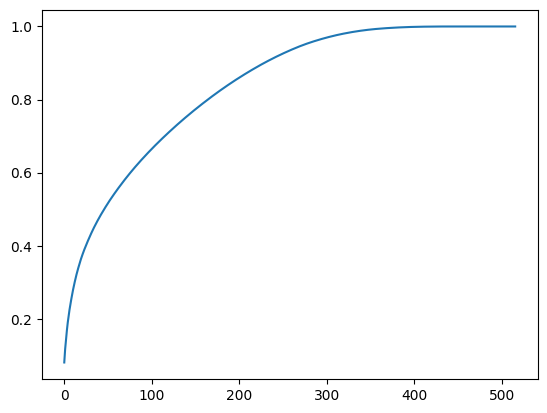

In [85]:
plt.plot(pca_result)

From Principal Component Analysis (PCA) we can see that around 250 features can explain beyond 90% variance in the dataset.
So, for our final predition model, let's consider that as our input features.

In [158]:
pca = PCA(n_components=250)
final_pc = pca.fit_transform(new_house_df_pca_processed)
np.cumsum(pca.explained_variance_ratio_)


array([0.08054645, 0.11706835, 0.14411447, 0.16854625, 0.19015756,
       0.20825508, 0.22496424, 0.23949723, 0.253437  , 0.26665147,
       0.27905883, 0.29071117, 0.30136183, 0.31163576, 0.32145823,
       0.33067092, 0.33910816, 0.34728311, 0.35538569, 0.36311815,
       0.37045946, 0.37710977, 0.38374714, 0.38999199, 0.39598925,
       0.40186242, 0.40770229, 0.41342364, 0.41895975, 0.42446723,
       0.42977985, 0.4350022 , 0.44014675, 0.44515606, 0.4500711 ,
       0.45478406, 0.45941673, 0.46395893, 0.46843376, 0.47286803,
       0.47715256, 0.48139457, 0.4855462 , 0.48962644, 0.49367889,
       0.49766926, 0.50161976, 0.50548131, 0.50932162, 0.51310926,
       0.51686581, 0.5205709 , 0.52422501, 0.52781902, 0.53136775,
       0.53485049, 0.5383071 , 0.54171665, 0.54512155, 0.54847731,
       0.55181668, 0.55510116, 0.55837669, 0.56160982, 0.56482558,
       0.56800561, 0.57116186, 0.57428603, 0.5774041 , 0.58049861,
       0.58356534, 0.5866025 , 0.58960072, 0.59257742, 0.59553

## Model development

In [159]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(final_pc, new_house_df['TOTALBTU_incode'], test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(4548, 250)
(1138, 250)


In [160]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [161]:
# Exploring XGBoost
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor()

xgb_regressor.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_regressor.predict(X_test_scaled)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"R-squared (R2) Score: {r2_xgb}")

print(f"Prediction on training set:\n{y_pred_xgb[:4]}" )
print(f"Target values \n{y_test[:4]}")

Mean Squared Error (MSE): 811806671.0825715
R-squared (R2) Score: 0.6126414802630972
Prediction on training set:
[ 54852.29  105559.336  73081.88  100820.84 ]
Target values 
3570     84541.516
4167    142959.287
4205     59914.702
1840     95651.464
Name: TOTALBTU_incode, dtype: float64


In [162]:
X = final_pc
y = new_house_df['TOTALBTU_incode']

xgb_regressor_cv = xgb.XGBRegressor()

r2_scores_cv = cross_val_score(xgb_regressor_cv, X, y, cv=10, scoring='r2')

print("Cross-validated R2 scores:", r2_scores_cv)
print("Average R2 score:", np.mean(r2_scores_cv))

Cross-validated R2 scores: [0.61132547 0.62346714 0.59570465 0.59694881 0.56607545 0.59300029
 0.55531871 0.61924527 0.58069157 0.66160487]
Average R2 score: 0.6003382229464269


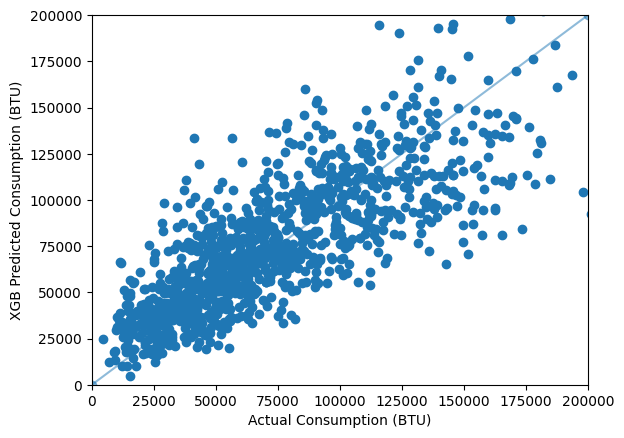

In [164]:
# Visualizing XGB model predictions vs. actuals
plt.scatter(y_test, y_pred_xgb)
plt.xlabel('Actual Consumption (BTU)')
plt.ylabel('XGB Predicted Consumption (BTU)')
plt.xlim([0, 200000])
plt.ylim([0, 200000])
plt.plot([0,200000],[0,200000],marker='o', alpha=0.5)
plt.savefig('preds_actuals.png')
plt.show()

In [168]:
# Exploring bagging (Random Forest) algorithm
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()

rf_regressor.fit(X_train_scaled, y_train)

y_pred_rf = rf_regressor.predict(X_test_scaled)

r2_rf = r2_score(y_test, y_pred_rf)

print(f"R-squared (R2) Score: {r2_rf}")

print(f"Prediction on training set:\n{y_pred_rf[:4]}" )
print(f"Target values \n{y_test[:4]}")


R-squared (R2) Score: 0.5903262439362589
Prediction on training set:
[ 45191.69412 116534.75606  72529.44818 107232.31987]
Target values 
3570     84541.516
4167    142959.287
4205     59914.702
1840     95651.464
Name: TOTALBTU_incode, dtype: float64


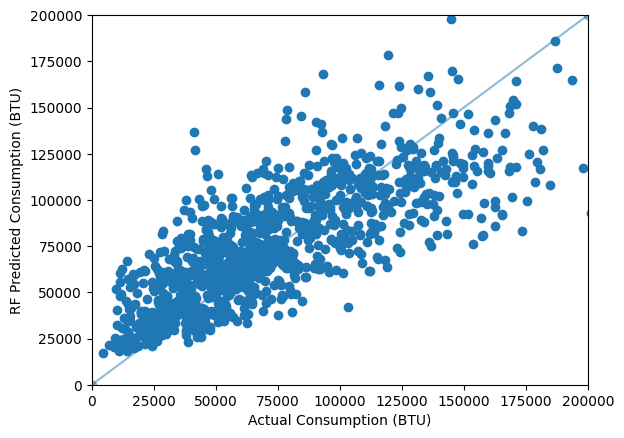

In [169]:
# Visualizing RF model predictions vs. actuals
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Consumption (BTU)')
plt.ylabel('RF Predicted Consumption (BTU)')
plt.xlim([0, 200000])
plt.ylim([0, 200000])
plt.plot([0,200000],[0,200000],marker='o', alpha=0.5)
plt.savefig('preds_actuals.png')
plt.show()

In [171]:
# Exploring Decision Tree algorithm
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()

dt_regressor.fit(X_train_scaled, y_train)

y_pred_dt = dt_regressor.predict(X_test_scaled)

r2_dt = r2_score(y_test, y_pred_dt)

print(f"R-squared (R2) Score: {r2_dt}")

print(f"Prediction on training set:\n{y_pred_dt[:4]}" )
print(f"Target values \n{y_test[:4]}")

R-squared (R2) Score: 0.2681122765340742
Prediction on training set:
[ 26614.97  148682.068  87827.236 107370.161]
Target values 
3570     84541.516
4167    142959.287
4205     59914.702
1840     95651.464
Name: TOTALBTU_incode, dtype: float64


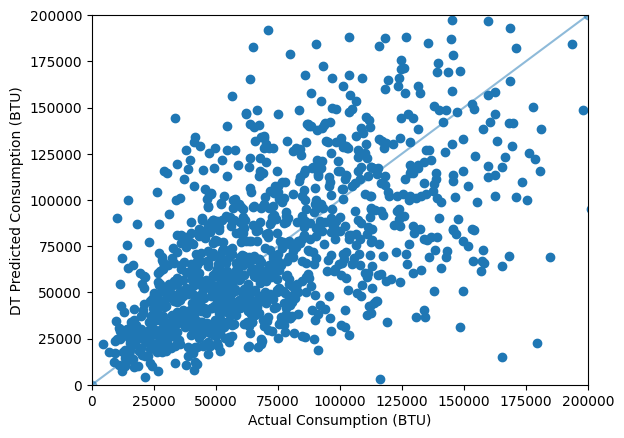

In [172]:
# Visualizing RF model predictions vs. actuals
plt.scatter(y_test, y_pred_dt)
plt.xlabel('Actual Consumption (BTU)')
plt.ylabel('DT Predicted Consumption (BTU)')
plt.xlim([0, 200000])
plt.ylim([0, 200000])
plt.plot([0,200000],[0,200000],marker='o', alpha=0.5)
plt.savefig('preds_actuals.png')
plt.show()